In [3]:
from skimage.morphology import skeletonize
from skimage import data, morphology, measure
from skimage.util import invert

import torch
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

import os
from PIL import Image

In [4]:
def plot_effect(image:np.array, mask:np.array, effect:np.array=None):
  if effect != None:
    fig, ax = plt.subplots(1,3, figsize=(12, 8))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(mask)
    ax[1].set_title("Mask")
    ax[2].imshow(effect)
    ax[2].set_title("Transformed")
  else:
    fig, ax = plt.subplots(1,2, figsize=(12, 8))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(mask)
    ax[1].set_title("Mask")
    
  plt.show()

In [5]:
path_mask = "mask.png"
path_img = "img.jpg"

np_mask = np.asarray(Image.open(path_mask))
np_img = np.asarray(Image.open(path_img))


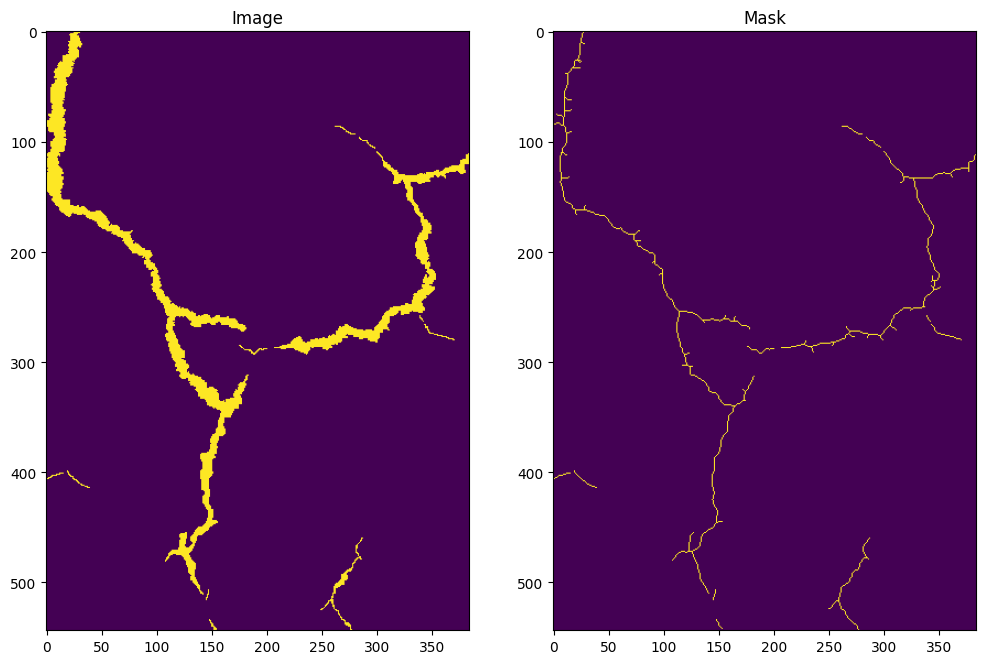

In [6]:
skeleton = skeletonize(np_mask)
plot_effect(np_mask, skeleton)


In [7]:
# from skimage.morphology import remove_small_objects, remove_small_holes, closing

# # Usuń małe artefakty (noise)
# mask_clean = remove_small_objects(np_mask, min_size=50)

# # Wypełnij dziury w pęknięciach
# mask_filled = remove_small_holes(mask_clean, area_threshold=30)

# # Domknij przerwy
# mask_closed = closing(mask_filled, footprint=np.ones((3,3)))

# plt.imshow(np_mask)
# plt.show()
# plt.imshow(mask_clean)
# plt.show()
# plt.imshow(mask_filled)

# plt.show()
# plt.imshow(mask_closed)
# plt.show()


In [8]:
labels = measure.label(skeleton)
props = measure.regionprops(labels)


for idx, prop in enumerate(props):
  print(f"Region {idx}\n")
  for p in prop:
    print(p, prop[p])

Region 0

area 829.0
area_bbox 93002.0
area_convex 44059.0
area_filled 829.0
axis_major_length 594.3418642292631
axis_minor_length 119.33279891778544
bbox (0, 1, 511, 183)
centroid (np.float64(251.54644149577805), np.float64(92.51266586248492))
centroid_local [251.5464415   91.51266586]
coords [[  0  28]
 [  0  29]
 [  0  30]
 ...
 [508 140]
 [509 140]
 [510 141]]
eccentricity 0.9796360673512108
equivalent_diameter_area 32.48869930584249
euler_number 0
extent 0.008913786800283865
feret_diameter_max 523.345010485435
image [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
image_convex [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False

In [9]:
# plot_effect(np_img, np_mask, np_mask*0.5)
from skimage.measure import find_contours

# contours = find_contours(skeleton, 0.5)
# print(len(contours))
# # plt.imshow(contours)

# for contour in contours:
#     # Oblicz długość wzdłuż konturu
#     length = 0
#     for i in range(len(contour) - 1):
#         p1 = contour[i]
#         p2 = contour[i + 1]
#         length += np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    
#     print(f"Długość pęknięcia: {length:.1f} px")

33


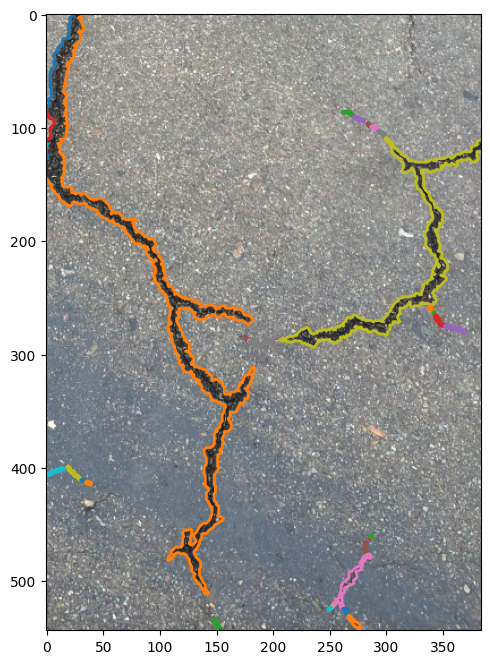

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
contours = measure.find_contours(np_mask, .9)
ax.imshow(np_mask, interpolation="nearest", cmap=plt.cm.gray)


for n, contour in enumerate(contours):
  ax.plot(contour[:,1], contour[:,0], linewidth=2)

print(len(contours))
plt.imshow(np_img)


https://tirthajyoti.github.io/Scikit-image-book/Finding_contours.html

In [11]:
from scipy.ndimage import distance_transform_edt

# Dla każdego piksela: odległość do krawędzi
distances = distance_transform_edt(np_mask)

# Średnia szerokość
width_avg = 2 * distances[skeleton > 0].mean()

# Maksymalna szerokość
width_max = 2 * distances.max()

print(f"Średnia szerokość: {width_avg:.2f} px")
print(f"Maksymalna szerokość: {width_max:.2f} px")

Średnia szerokość: 6.09 px
Maksymalna szerokość: 19.70 px


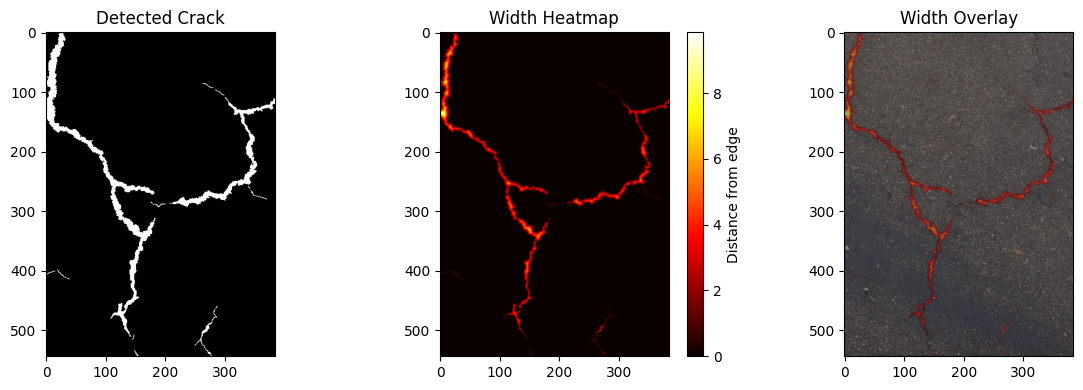

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(np_mask, cmap='gray')
plt.title("Detected Crack")

plt.subplot(1, 3, 2)
plt.imshow(distances, cmap='hot')
plt.colorbar(label='Distance from edge')
plt.title("Width Heatmap")

plt.subplot(1, 3, 3)
plt.imshow(np_img)
plt.imshow(distances, cmap='hot', alpha=0.5)
plt.title("Width Overlay")

plt.tight_layout()
plt.show()